In [ ]:
#  Binary Logistic Regression
# Primary objective of a classification model is to predict the probability of an observation belonging to a class, known as class probability. There are several ways of solving classification problems such as Logistics Regression, Classification Trees, Discriminant Analysis, Neural Network , and Support Vector Machine.*

In [1]:
import pandas as pd
import numpy as np
import os

os.chdir("D:\Dataset")

credit_df = pd.read_csv("german_credit.csv")
credit_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [2]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [3]:
first_7_columns = credit_df.iloc[0:5,0:7]
first_7_columns.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM


In [4]:
second_7_columns = credit_df.iloc[0:5,7:14]
second_7_columns.head()

,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age
0,.. >= 7 years,4,male : single,none,4,real estate,67
1,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22
2,4 <= ... < 7 years,2,male : single,none,3,real estate,49
3,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45
4,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53


In [5]:
third_7_columns = credit_df.iloc[0:5,14:21]
third_7_columns.head()

,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,none,own,1,skilled employee / official,1,none,yes
2,none,own,1,unskilled - resident,2,none,yes
3,none,for free,1,skilled employee / official,2,none,yes
4,none,for free,2,skilled employee / official,2,none,yes


##### To find the number of observations in the dataset for good credit and for bad credit, a simple value_count() on the status column will provide the informtion

In [6]:
credit_df.people_under_maintenance.value_counts()

1    845
2    155
Name: people_under_maintenance, dtype: int64

In [7]:
#The output displays that there are 845 in category-1  and 155 in category-2. 

#For building a classification model, the people_under_maintenance column will be used as the dependent variable, 
#while the remaining variables will be used as independent variables or features.

#We will create a list named X_features and the names of all independent variables for further use.

In [8]:
X_features = list(credit_df.columns)
X_features.remove("people_under_maintenance")
X_features

['default',
 'account_check_status',
 'duration_in_month',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings',
 'present_emp_since',
 'installment_as_income_perc',
 'personal_status_sex',
 'other_debtors',
 'present_res_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits_this_bank',
 'job',
 'telephone',
 'foreign_worker']

In [9]:
# Encoding Categorical Features

#There are several featues in the data which need to be binary encoded (using dummy variables) also known as ONE HOT ENCODING(OHE)
#Pandas method pd.get_dummies() is used to encode the categorical features and get dummy variables

encoded_credit_df = pd.get_dummies(credit_df[X_features],drop_first = True)

list(encoded_credit_df)

['default',
 'duration_in_month',
 'credit_amount',
 'installment_as_income_perc',
 'present_res_since',
 'age',
 'credits_this_bank',
 'account_check_status_< 0 DM',
 'account_check_status_>= 200 DM / salary assignments for at least 1 year',
 'account_check_status_no checking account',
 'credit_history_critical account/ other credits existing (not at this bank)',
 'credit_history_delay in paying off in the past',
 'credit_history_existing credits paid back duly till now',
 'credit_history_no credits taken/ all credits paid back duly',
 'purpose_business',
 'purpose_car (new)',
 'purpose_car (used)',
 'purpose_domestic appliances',
 'purpose_education',
 'purpose_furniture/equipment',
 'purpose_radio/television',
 'purpose_repairs',
 'purpose_retraining',
 'savings_... < 100 DM',
 'savings_100 <= ... < 500 DM',
 'savings_500 <= ... < 1000 DM ',
 'savings_unknown/ no savings account',
 'present_emp_since_... < 1 year ',
 'present_emp_since_1 <= ... < 4 years',
 'present_emp_since_4 <= .

In [10]:
#Displaying dummy variables to verify how they're encoded
encoded_credit_df[["housing_own","housing_rent"]].head(5)

,housing_own,housing_rent
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0


In [13]:
import statsmodels.api as sm

Y = credit_df.people_under_maintenance
X = sm.add_constant(encoded_credit_df)

y = np.where(Y > 1, 0, Y)

In [26]:
#Splitting the dataset into Training and Test sets

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 250)


In [27]:
#Building Logistic Regression Model
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

         Current function value: 0.347318
         Iterations: 35


C:\Users\sumed\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [28]:
# Printing model summary

logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                         Results: Logit
================================================================================================================================
Model:                                   Logit                                 Pseudo R-squared:                      0.206     
Dependent Variable:                      y                                     AIC:                                   584.2455  
Date:                                    2020-11-09 09:03                      BIC:                                   807.2484  
No. Observations:                        700                                   Log-Likelihood:                        -243.12   
Df Model:                                48                                    LL-Null:                               -306.11   
Df Residuals:                            651                                   LLR p-value:                           6.4291e-09
Converged:                               0.0000                                Scale:                                 1.0000    
No. Iterations:                          35.0000                                                                                
--------------------------------------------------------------------------------------------------------------------------------
                                                                            Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
--------------------------------------------------------------------------------------------------------------------------------
const                                                                       1.4834    1.8072  0.8208 0.4118    -2.0587    5.0255
default                                                                    -0.2672    0.3058 -0.8740 0.3821    -0.8665    0.3321
duration_in_month                                                          -0.0059    0.0140 -0.4225 0.6726    -0.0334    0.0215
credit_amount                                                               0.0001    0.0001  1.4950 0.1349    -0.0000    0.0002
installment_as_income_perc                                                  0.2692    0.1282  2.0998 0.0357     0.0179    0.5206
present_res_since                                                          -0.0055    0.1279 -0.0427 0.9659    -0.2562    0.2453
age                                                                        -0.0123    0.0127 -0.9637 0.3352    -0.0372    0.0127
credits_this_bank                                                          -0.2195    0.2241 -0.9795 0.3273    -0.6588    0.2197
account_check_status_< 0 DM                                                -0.2617    0.3505 -0.7468 0.4552    -0.9487    0.4252
account_check_status_>= 200 DM / salary assignments for at least 1 year     0.2212    0.5640  0.3922 0.6949    -0.8842    1.3266
account_check_status_no checking account                                    0.0643    0.3276  0.1964 0.8443    -0.5778    0.7064
credit_history_critical account/ other credits existing (not at this bank)  0.5991    0.5733  1.0449 0.2961    -0.5246    1.7228
credit_history_delay in paying off in the past                              0.2163    0.6408  0.3376 0.7357    -1.0396    1.4722
credit_history_existing credits paid back duly till now                     0.2995    0.5191  0.5770 0.5639    -0.7179    1.3170
credit_history_no credits taken/ all credits paid back duly                 0.4366    0.7788  0.5606 0.5751    -1.0898    1.9630
purpose_business                                                            0.1709    0.6551  0.2609 0.7942    -1.1130    1.4549
purpose_car (new)                                                          -0.0760    0.5662 -0.1343 0.8932    -1.1858    1.0337
purpose_car (used)                                                         -0.1269    0.6292 -0.2016 0.8402    -1.3602    1.1064
purpose_d

In [34]:
# Model Diagnostics

def get_significant_vars(lm):
#store p-values and corresponding colum names in a dataframe
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df["vars"] = var_p_vals_df.index
    var_p_vals_df.columns = ["pvals","vars"]
#Filter the column names where p-value is less than 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]["vars"])
    

In [35]:
significant_vars = get_significant_vars (logit_model)
significant_vars

['installment_as_income_perc',
 'personal_status_sex_male : single',
 'other_debtors_guarantor',
 'job_unskilled - resident']

In [38]:
final_logit = sm.Logit(y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.379908
         Iterations 7


C:\Users\sumed\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Pseudo R-squared:      0.131     
Dependent Variable:       y                     AIC:                   541.8714  
Date:                     2020-11-09 09:23      BIC:                   564.6268  
No. Observations:         700                   Log-Likelihood:        -265.94   
Df Model:                 4                     LL-Null:               -306.11   
Df Residuals:             695                   LLR p-value:           1.4761e-16
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           7.0000                                                 
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
const                              2.7912   0.3978  7.0168 0.0000  2.0115  3.5708
installment_as_income_perc         0.1892   0.1005  1.8830 0.0597 -0.0077  0.3861
personal_status_sex_male : single -2.0117   0.2963 -6.7889 0.0000 -2.5924 -1.4309
other_debtors_guarantor           -0.7688   0.4500 -1.7087 0.0875 -1.6508  0.1131
job_unskilled - resident          -0.8883   0.2481 -3.5806 0.0003 -1.3746 -0.4021
=================================================================================

"""

In [40]:
#Prediction on Test Data

y_pred_df = pd.DataFrame({"actual":y_test, "predicted_prob": final_logit.predict(sm.add_constant(X_test[significant_vars]))})

In [41]:
y_pred_df.sample(10, random_state = 100)

,actual,predicted_prob
337,1,0.972018
923,0,0.793636
743,1,0.822903
725,1,0.907305
448,1,0.966387
60,1,0.959670
272,1,0.822903
242,0,0.793636
434,1,0.793636
202,1,0.793636


In [42]:
y_pred_df["predicted"] = y_pred_df.predicted_prob.map(lambda x: 1 if x>0.5 else 0)
y_pred_df.sample(10, random_state = 150)

,actual,predicted_prob,predicted
280,1,0.793636,1
986,1,0.959670,1
753,1,0.972018,1
401,1,0.972018,1
259,1,0.934593,1
213,1,0.822903,1
68,1,0.822903,1
895,0,0.793636,1
487,1,0.972018,1
10,1,0.966387,1


In [45]:
#Creating Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
from sklearn import metrics
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True, fmt = ".2f",
               xticklabels = ["Bad credit", "Good Credit"],
               yticklabels = ["Bad credit","Good Credit"])
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

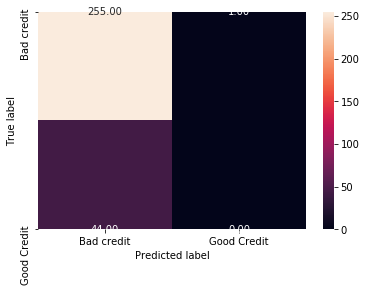

In [52]:
draw_cm(y_pred_df.actual, y_pred_df.predicted)

In [53]:
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.85      1.00      0.92       256

    accuracy                           0.85       300
   macro avg       0.43      0.50      0.46       300
weighted avg       0.73      0.85      0.78       300

